In [ ]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("./data.csv")
p1_ace = df["p1_ace"]
p2_ace = df["p2_ace"]
p1_winer = df["p1_winner"]
p2_winer = df["p2_winner"]
p1_double_fault = df["p1_double_fault"]
p2_double_fault = df["p2_double_fault"]
p1_unf_err = df["p1_unf_err"]
p2_unf_err = df["p1_unf_err"]
p2_net_pt_won = df["p2_net_pt_won"]
p1_net_pt_won = df["p1_net_pt_won"]
p1_break_pt = df["p1_break_pt"]
p2_break_pt = df["p1_break_pt"]
p1_break_pt_won = df["p1_break_pt_won"]
p2_break_pt_won = df["p2_break_pt_won"]
p1_break_pt_missed = df["p1_break_pt_missed"]
p2_break_pt_missed = df["p2_break_pt_missed"]
point_victor = df["point_victor"]
p1_net_pt = df["p1_net_pt"]
p2_net_pt = df["p2_net_pt"]

winer = [0]*len(p1_winer)
ace = [0]*len(p1_ace)
double_fault = [0]*len(p1_double_fault)
unf_err = [0]*len(p1_unf_err)
net_pt_won = [0]*len(p1_net_pt_won)
net_pt = [0] * len(p1_net_pt)
break_pt = [0]*len(p2_break_pt)
break_pt_won = [0]*len(p1_break_pt_won)
break_pt_missed = [0]*len(p2_break_pt_missed)
point_vic = [0]*len(point_victor)


for i in range(len(p1_ace)):
    if(p1_ace[i]==1):
        ace[i] = 1
    elif p2_ace[i]==1:
        ace[i] = -1

    if(p1_winer[i]==1):
        winer[i] = 1
    elif p2_winer[i]==1:
        winer[i] = -1

    if(p1_net_pt_won[i]==1):
        net_pt_won[i] = 1
    elif p2_net_pt_won[i]==1:
        net_pt_won[i] = -1

    if(p1_net_pt[i]==1):
        net_pt[i] = 1
    elif p2_net_pt[i]==1:
        net_pt[i] = -1


    if(p1_double_fault[i]==1):
        double_fault[i] = 1
    elif p2_double_fault[i]==1:
        double_fault[i] = -1

    if(p1_unf_err[i]==1):
        unf_err[i] = 1
    elif p2_unf_err[i]==1:
        unf_err[i] = -1

    if(p1_break_pt[i]==1):
        break_pt[i] = 1
    elif p2_break_pt[i]==1:
        break_pt[i] = -1
    
    if(p1_break_pt_won[i]==1):
        break_pt_won[i] = 1
    elif p2_break_pt_won[i]==1:
        break_pt_won[i] = -1

    if point_victor[i] == 1:
        point_vic[i] = 1
    elif point_victor[i] == 2:
        point_vic[i] = -1

    if p1_break_pt_missed[i] == 1:
        break_pt_missed[i] = 1
    elif p2_break_pt_missed[i] == -1:
        break_pt_missed[i] = -1
    
winer = np.array(winer)
point_vic = np.array(point_vic)
print(ace[:50])
print(winer[:50])

print(double_fault[:100])



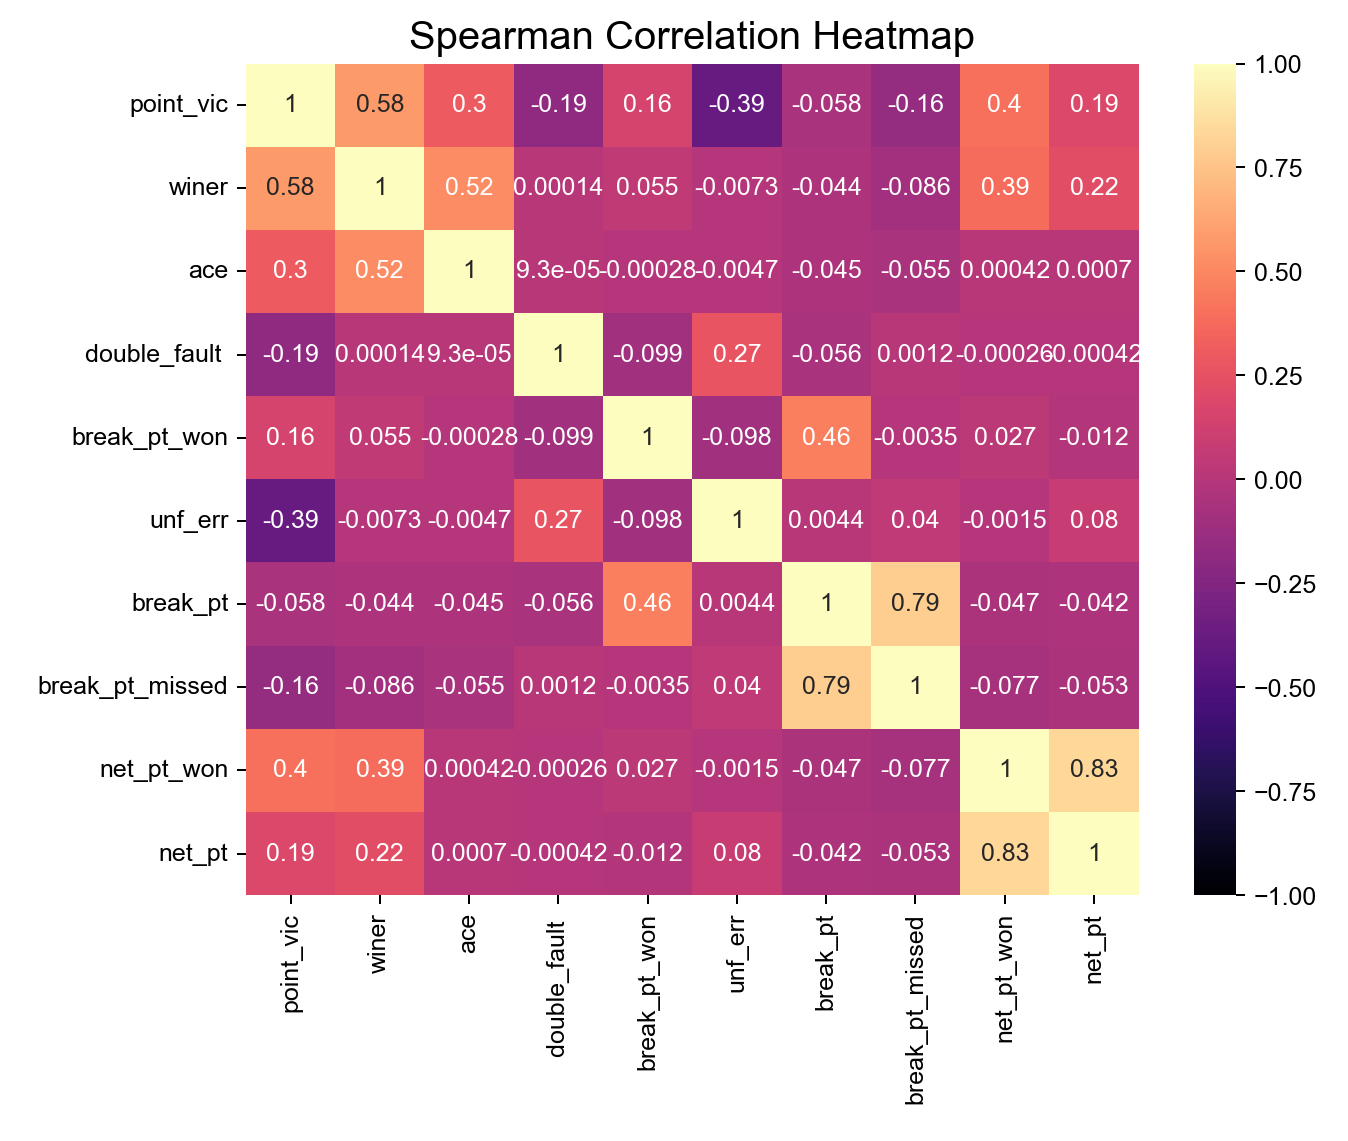

In [3]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pylab as plt
corrdata = {
    "point_vic" :point_vic,
    "winer" : winer,
    "ace" : ace,
    "double_fault ": double_fault ,
    "break_pt_won": break_pt_won,
    "unf_err" : unf_err,
    "break_pt":break_pt,
    "break_pt_won":break_pt_won,
    "break_pt_missed":break_pt_missed,
    "net_pt_won":net_pt_won,
    "net_pt":net_pt
}

df1 = pd.DataFrame(corrdata)
plt.figure(figsize=(8,6),dpi=180)
plt.title('Spearman Correlation Heatmap', fontsize=16)
sp_cor = df1.corr(method="spearman")
sns.heatmap(sp_cor, cmap='magma', vmin=-1, vmax=1,annot=True)
sns.set(font_scale=0.4)

plt.show()



In [1]:
import csv 
M1 = []
with open('M.csv', 'r', newline='', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
    
    for row in csv_reader:
        M1.append(row)
M2 = []
with open('M2.csv', 'r', newline='', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
    
    for row in csv_reader:
        M2.append(row)
M1 = M1[0]
M2 = M2[0]
print(len(M1),len(M2))

7284 7284


In [56]:

serve_vec = [0]*len(df["server"])
for i in range(len(df["server"])):
    if(df["server"][i] == 1):
        serve_vec[i] = int(point_vic[i]==1)
    elif df["server"][i] == 2:
        serve_vec[i] = int(point_vic[i] == -1)

P_serverwin = sum(serve_vec) / len(serve_vec)



serve_width = df["serve_width"]
serve_depth = df["serve_depth"]
return_depth = df["return_depth"]
serve_comb_low = {}
serve_comb_high = {}
serve_comb_diss = {}
serve_comb_cnt_low = {}
serve_comb_cnt_high = {}

serve_fault_cnt_high = {}
serve_fault_cnt_low = {}
serve_fault_cnt_diss = {}
#serve_comb_err
Mhash = {"1":M1,"2":M2}


for i in range(len(serve_width)):
    #serve_comb[f"{serve_width[i]},{serve_depth[i]},{return_depth[i]}" ] = 0
    #serve_comb_cnt[f"{serve_width[i]},{serve_depth[i]},{return_depth[i]}" ] = 0
    serve_comb_low[f"{serve_width[i]},{serve_depth[i]}" ] = 0
    serve_comb_cnt_low[f"{serve_width[i]},{serve_depth[i]}"] = 0
    serve_comb_cnt_high[f"{serve_width[i]},{serve_depth[i]}"] = 0
    serve_comb_high[f"{serve_width[i]},{serve_depth[i]}"] = 0
    serve_comb_diss[f"{serve_width[i]},{serve_depth[i]}"] = 0
    serve_fault_cnt_diss[f"{serve_width[i]},{serve_depth[i]}"] = 0
    serve_fault_cnt_high[f"{serve_width[i]},{serve_depth[i]}"] = 0
    serve_fault_cnt_low[f"{serve_width[i]},{serve_depth[i]}"] = 0



for i in range(len(serve_width)):
    #serve_comb_cnt[f"{serve_width[i]},{serve_depth[i]},{return_depth[i]}" ] += 1
    if df["server"][i] == 1:#low
        if M1[i] < M2[i]:
            serve_comb_cnt_low[f"{serve_width[i]},{serve_depth[i]}"] += 1
    if df["server"][i] == 2:
        if M1[i] > M2[i]:
            serve_comb_cnt_low[f"{serve_width[i]},{serve_depth[i]}"] += 1


    if df["server"][i] == 1:
        if M1[i] > M2[i]:
            serve_comb_cnt_high[f"{serve_width[i]},{serve_depth[i]}"] += 1
    if df["server"][i] == 2:
        if M1[i] < M2[i]:
            serve_comb_cnt_high[f"{serve_width[i]},{serve_depth[i]}"] += 1



for i in range(len(serve_width)):
    #serve_comb[f"{serve_width[i]},{serve_depth[i]},{return_depth[i]}" ] += serve_vec[i] 
    #serve_comb[f"{serve_width[i]},{serve_depth[i]}"] += serve_vec[i] 
    if df["server"][i] == 1:  #mome low
        if M1[i] < M2[i]:
            serve_comb_low[f"{serve_width[i]},{serve_depth[i]}"] += serve_vec[i] 
            #if df["p1_double_fault"][i] == 1:
             #   serve_fault_cnt_low[f"{serve_width[i]},{serve_depth[i]}"] += 1
            if df["p1_unf_err"][i] == 1:
                serve_fault_cnt_low[f"{serve_width[i]},{serve_depth[i]}"] += 1

    if df["server"][i] == 2:
        if M1[i] > M2[i]:
            serve_comb_low[f"{serve_width[i]},{serve_depth[i]}"] += serve_vec[i] 
            #if df["p2_double_fault"][i] == 1:
             #   serve_fault_cnt_low[f"{serve_width[i]},{serve_depth[i]}"] += 1
            if df["p2_unf_err"][i] == 1:
                serve_fault_cnt_low[f"{serve_width[i]},{serve_depth[i]}"] += 1
    ##################################################
                
    if df["server"][i] == 1:
        if M1[i] > M2[i]:
            serve_comb_high[f"{serve_width[i]},{serve_depth[i]}"] += serve_vec[i] 
            #if df["p1_double_fault"][i] == 1:
             #   serve_fault_cnt_high[f"{serve_width[i]},{serve_depth[i]}"] += 1
            if df["p1_unf_err"][i] == 1:
                serve_fault_cnt_high[f"{serve_width[i]},{serve_depth[i]}"] += 1
    if df["server"][i] == 2:
        if M1[i] < M2[i]:
            serve_comb_high[f"{serve_width[i]},{serve_depth[i]}"] += serve_vec[i] 
            #if df["p2_double_fault"][i] == 1:
             #   serve_fault_cnt_high[f"{serve_width[i]},{serve_depth[i]}"] += 1
            if df["p2_unf_err"][i] == 1:
                serve_fault_cnt_high[f"{serve_width[i]},{serve_depth[i]}"] += 1




del serve_comb_low['nan,nan']
del serve_comb_cnt_high['nan,nan']
del serve_comb_cnt_low['nan,nan']
del serve_comb_diss['nan,nan']
del serve_comb_high['nan,nan']
del serve_fault_cnt_high['nan,nan']
del serve_fault_cnt_low['nan,nan']
del serve_fault_cnt_diss['nan,nan']
print(len(serve_comb_low))
print(serve_comb_low)
print(P_serverwin)
print(serve_comb_cnt_low)
print(serve_comb_cnt_high)
print(len(serve_comb_low))
print(serve_fault_cnt_low)
print(serve_fault_cnt_high)


10
{'BC,NCTL': 122, 'B,CTL': 22, 'B,NCTL': 102, 'BW,CTL': 25, 'W,NCTL': 92, 'BW,NCTL': 166, 'W,CTL': 243, 'BC,CTL': 40, 'C,NCTL': 321, 'C,CTL': 79}
0.6731191652937946
{'BC,NCTL': 199, 'B,CTL': 38, 'B,NCTL': 175, 'BW,CTL': 47, 'W,NCTL': 123, 'BW,NCTL': 294, 'W,CTL': 310, 'BC,CTL': 68, 'C,NCTL': 417, 'C,CTL': 105}
{'BC,NCTL': 642, 'B,CTL': 114, 'B,NCTL': 516, 'BW,CTL': 137, 'W,NCTL': 353, 'BW,NCTL': 828, 'W,CTL': 987, 'BC,CTL': 159, 'C,NCTL': 1325, 'C,CTL': 362}
10
{'BC,NCTL': 28, 'B,CTL': 13, 'B,NCTL': 31, 'BW,CTL': 14, 'W,NCTL': 10, 'BW,NCTL': 47, 'W,CTL': 30, 'BC,CTL': 16, 'C,NCTL': 45, 'C,CTL': 12}
{'BC,NCTL': 127, 'B,CTL': 48, 'B,NCTL': 103, 'BW,CTL': 34, 'W,NCTL': 44, 'BW,NCTL': 130, 'W,CTL': 109, 'BC,CTL': 49, 'C,NCTL': 178, 'C,CTL': 71}


In [57]:
for k,v in serve_comb_low.items():
    
    serve_comb_low[k] /= serve_comb_cnt_low[k]
    serve_fault_cnt_low[k] /= serve_comb_cnt_low[k]

print(serve_comb_low)
print(serve_fault_cnt_low)

for k,v in serve_comb_high.items():
    
    serve_comb_high[k] /= serve_comb_cnt_high[k]
    serve_fault_cnt_high[k] /= serve_comb_cnt_high[k]

print(serve_comb_high)
print(serve_fault_cnt_high)

for k,v in serve_comb_diss.items():
    
    serve_comb_diss[k] = serve_comb_high[k] - serve_comb_low[k]
    serve_fault_cnt_diss[k] = serve_fault_cnt_high[k] - serve_fault_cnt_low[k]
    
print(serve_comb_diss)

{'BC,NCTL': 0.6130653266331658, 'B,CTL': 0.5789473684210527, 'B,NCTL': 0.5828571428571429, 'BW,CTL': 0.5319148936170213, 'W,NCTL': 0.7479674796747967, 'BW,NCTL': 0.564625850340136, 'W,CTL': 0.7838709677419354, 'BC,CTL': 0.5882352941176471, 'C,NCTL': 0.7697841726618705, 'C,CTL': 0.7523809523809524}
{'BC,NCTL': 0.1407035175879397, 'B,CTL': 0.34210526315789475, 'B,NCTL': 0.17714285714285713, 'BW,CTL': 0.2978723404255319, 'W,NCTL': 0.08130081300813008, 'BW,NCTL': 0.1598639455782313, 'W,CTL': 0.0967741935483871, 'BC,CTL': 0.23529411764705882, 'C,NCTL': 0.1079136690647482, 'C,CTL': 0.11428571428571428}
{'BC,NCTL': 0.5934579439252337, 'B,CTL': 0.45614035087719296, 'B,NCTL': 0.5910852713178295, 'BW,CTL': 0.5766423357664233, 'W,NCTL': 0.7082152974504249, 'BW,NCTL': 0.605072463768116, 'W,CTL': 0.78419452887538, 'BC,CTL': 0.5786163522012578, 'C,NCTL': 0.7139622641509434, 'C,CTL': 0.712707182320442}
{'BC,NCTL': 0.19781931464174454, 'B,CTL': 0.42105263157894735, 'B,NCTL': 0.1996124031007752, 'BW,CT

In [7]:
p1_distance = df["p1_distance_run"]
p2_distance = df["p2_distance_run"]

distance = [0]*len(p1_distance)

print(p1_distance.mean(),p1_distance.std())


for i in range(len(p1_distance)):
    if p1_distance[i] > p2_distance[i]:
        distance[i] = 1
    elif p1_distance[i] < p2_distance[i]:
        distance[i] = -1


print(stats.spearmanr(distance,point_vic))

14.002310680944536 13.492860956326274
SignificanceResult(statistic=-0.16407019153615957, pvalue=4.018634844166676e-45)


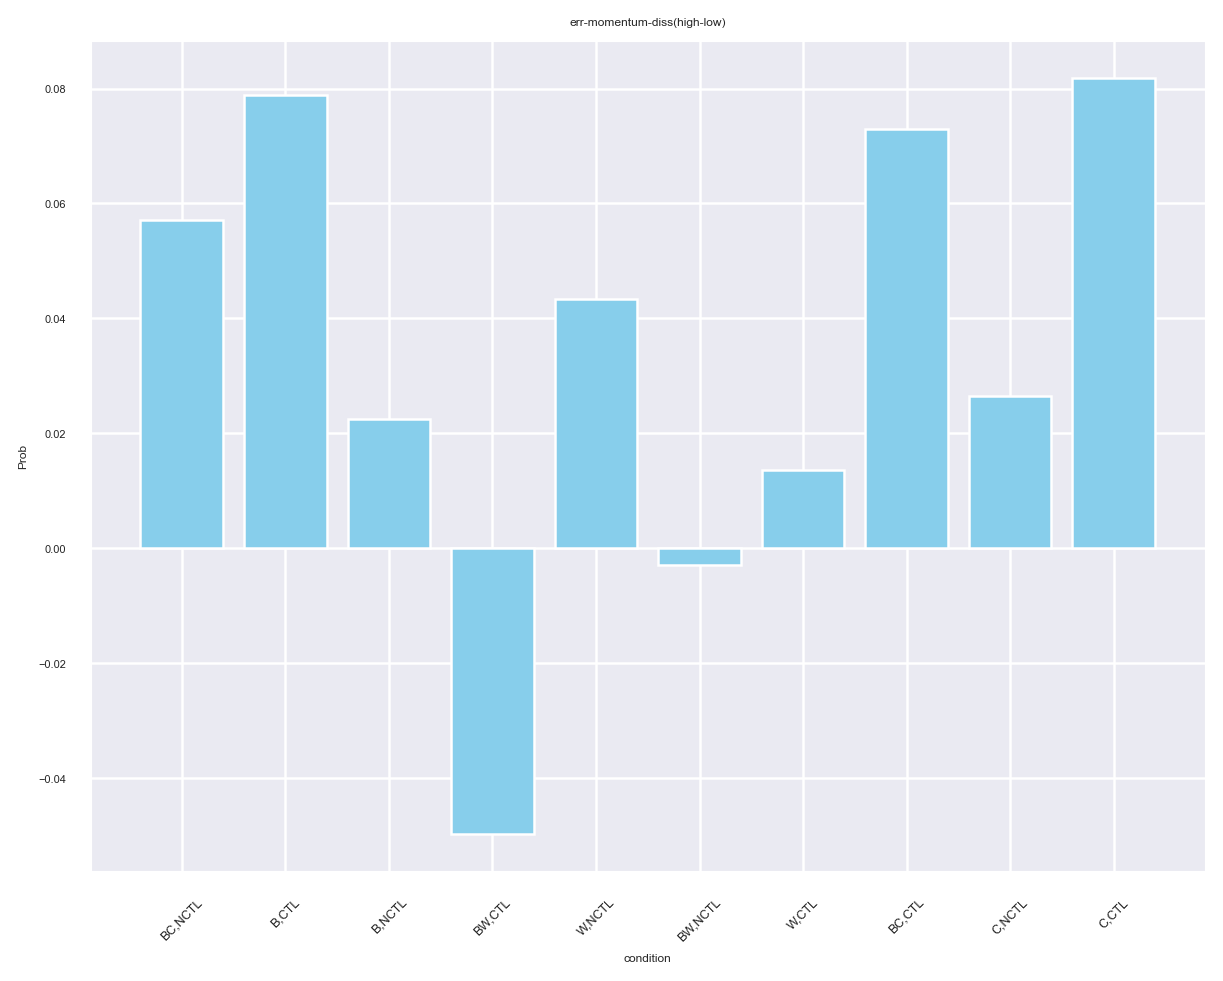

In [59]:
keys = list(serve_fault_cnt_diss.keys())
values = list(serve_fault_cnt_diss.values())

# 绘制条形图

plt.figure(figsize=(8,6),dpi=180)
plt.bar(keys, values, color='skyblue')
plt.xlabel('condition')
plt.ylabel('Prob')
plt.xticks(range(0, len(keys), 1), rotation=45,fontsize=5)
plt.title("err-momentum-diss(high-low)")
# 显示图形
plt.show()

In [9]:
for i in range(len(serve_width)):
    serve_comb[f"{serve_width[i]},{serve_depth[i]},{return_depth[i]}" ] = 0

conti_win = [0]*len(serve_vec)

for i in range(len(serve_vec)-1):
    if(serve_vec[i+1]==serve_vec[i] and serve_vec[i]==1):
        conti_win[i+1] = 1
    elif  serve_vec[i+1]==serve_vec[i] and serve_vec[i]==-1:
        conti_win[i+1] = -1


print(stats.spearmanr(conti_win,serve_vec))


SignificanceResult(statistic=0.638457018770129, pvalue=0.0)


In [10]:
speed_mph = df["speed_mph"]

print(speed_mph.mean(),speed_mph.std())

speed_mph_bin = [0]*len(speed_mph)

for i in range(len(speed_mph)):
    if speed_mph[i] > speed_mph.mean():
        speed_mph_bin[i] = 1
    else :
        speed_mph_bin[i] = 0

print(stats.spearmanr(speed_mph_bin,serve_vec))

112.40967544396815 12.858115922605144
SignificanceResult(statistic=0.19545345789092736, pvalue=1.2205297933415648e-63)


In [ ]:
trans = pd.read_csv("./m_trans_.csv",header=None)
cl1 = list(trans.iloc[:,0])
cl2 = list(trans.iloc[:,1])
groped = df.groupby("match_id")
print(groped.describe())

7284 7284


In [79]:
from collections import defaultdict
feacture = {}
players_cnt = {}
palyer_cnt_serv = {}
players_invo = {}
names = set()
for gk,gv in groped.groups.items():
    p1name = df["player1"][gv[0]]
    p2name = df["player2"][gv[0]]
    names.add(p1name)
    names.add(p2name)
    players_cnt[p1name] = 0
    players_cnt[p2name] = 0
    feacture[p1name] = {"brk_cnt":0,"brk_won":0,"net_cnt":0,"net_won":0,"unf_err_cnt":0,"dub_fault_cnt":0,"ace_cnt":0,"dist":0,"mode":defaultdict(int) }
    feacture[p2name] = {"brk_cnt":0,"brk_won":0,"net_cnt":0,"net_won":0,"unf_err_cnt":0,"dub_fault_cnt":0,"ace_cnt":0,"dist":0,"mode":defaultdict(int)}
    palyer_cnt_serv[p1name] = 0
    palyer_cnt_serv[p2name] = 0
    players_invo[p1name] = 0
    players_invo[p2name] = 0
    

print(feacture)

{'Carlos Alcaraz': {'brk_cnt': 0, 'brk_won': 0, 'net_cnt': 0, 'net_won': 0, 'unf_err_cnt': 0, 'dub_fault_cnt': 0, 'ace_cnt': 0, 'dist': 0, 'mode': defaultdict(<class 'int'>, {})}, 'Nicolas Jarry': {'brk_cnt': 0, 'brk_won': 0, 'net_cnt': 0, 'net_won': 0, 'unf_err_cnt': 0, 'dub_fault_cnt': 0, 'ace_cnt': 0, 'dist': 0, 'mode': defaultdict(<class 'int'>, {})}, 'Alexander Zverev': {'brk_cnt': 0, 'brk_won': 0, 'net_cnt': 0, 'net_won': 0, 'unf_err_cnt': 0, 'dub_fault_cnt': 0, 'ace_cnt': 0, 'dist': 0, 'mode': defaultdict(<class 'int'>, {})}, 'Matteo Berrettini': {'brk_cnt': 0, 'brk_won': 0, 'net_cnt': 0, 'net_won': 0, 'unf_err_cnt': 0, 'dub_fault_cnt': 0, 'ace_cnt': 0, 'dist': 0, 'mode': defaultdict(<class 'int'>, {})}, 'Frances Tiafoe': {'brk_cnt': 0, 'brk_won': 0, 'net_cnt': 0, 'net_won': 0, 'unf_err_cnt': 0, 'dub_fault_cnt': 0, 'ace_cnt': 0, 'dist': 0, 'mode': defaultdict(<class 'int'>, {})}, 'Grigor Dimitrov': {'brk_cnt': 0, 'brk_won': 0, 'net_cnt': 0, 'net_won': 0, 'unf_err_cnt': 0, 'dub_f

In [80]:


print(groped.groups.keys())

players_ace = {}
for gk,gv in groped.groups.items():
    p1name = df["player1"][gv[0]]
    p2name = df["player2"][gv[0]]
    players_cnt[p1name] += len(gv)
    players_cnt[p2name] += len(gv)
    players_invo[p1name] += 1
    players_invo[p2name] +=  1

    for i in gv:
        
        if df["server"][i]== 1 and df["p1_double_fault"][i]==1:#M1[i]< M2[i] : #and df["point_victor"][i] ==1:     #
            feacture[p1name]["mode"][f"{serve_width[i]},{serve_depth[i]}"] += 1

        if df["server"][i] == 2 and df["p2_double_fault"][i]==1:#M2[i]<M1[i]: #df["point_victor"][i] ==2 :#and 
            
            feacture[p2name]["mode"][f"{serve_width[i]},{serve_depth[i]}"] += 1 
            
        palyer_cnt_serv[p1name] += (df["server"][i] == 1 )
        palyer_cnt_serv[p2name] += (df["server"][i] == 2 )

        feacture[p1name]["brk_cnt"] += df["p1_break_pt"][i]
        feacture[p2name]["brk_cnt"] += df["p2_break_pt"][i]

        feacture[p1name]["brk_won"] += df["p1_break_pt_won"][i]
        feacture[p2name]["brk_won"] += df["p2_break_pt_won"][i]

        feacture[p1name]["net_cnt"] += df["p1_net_pt"][i]
        feacture[p2name]["net_cnt"] += df["p2_net_pt"][i]

        feacture[p1name]["net_won"] += df["p1_net_pt_won"][i]
        feacture[p2name]["net_won"] += df["p2_net_pt_won"][i]

        feacture[p1name]["unf_err_cnt"] += df["p1_unf_err"][i]
        feacture[p2name]["unf_err_cnt"] += df["p2_unf_err"][i]

        feacture[p1name]["dub_fault_cnt"] += df["p1_double_fault"][i]
        feacture[p2name]["dub_fault_cnt"] += df["p2_double_fault"][i]

        feacture[p1name]["ace_cnt"] += df["p1_ace"][i]
        feacture[p2name]["ace_cnt"] += df["p2_ace"][i]

        feacture[p1name]["ace_cnt"] += df["p1_ace"][i]
        feacture[p2name]["ace_cnt"] += df["p2_ace"][i]

        feacture[p1name]["dist"] += df["p1_distance_run"][i]
        feacture[p2name]["dist"] += df["p1_distance_run"][i]





print(feacture['Carlos Alcaraz'])
print(players_cnt['Carlos Alcaraz'])
print(palyer_cnt_serv['Carlos Alcaraz'])

for p in names:
    if feacture[p]["brk_cnt"] == 0:
        print(p)
    #print(feacture[p]["brk_won"])

print(feacture)
print(players_invo)
print(players_cnt)
print(palyer_cnt_serv)




dict_keys(['2023-wimbledon-1301', '2023-wimbledon-1302', '2023-wimbledon-1303', '2023-wimbledon-1304', '2023-wimbledon-1305', '2023-wimbledon-1306', '2023-wimbledon-1307', '2023-wimbledon-1308', '2023-wimbledon-1309', '2023-wimbledon-1310', '2023-wimbledon-1311', '2023-wimbledon-1312', '2023-wimbledon-1313', '2023-wimbledon-1314', '2023-wimbledon-1315', '2023-wimbledon-1316', '2023-wimbledon-1401', '2023-wimbledon-1402', '2023-wimbledon-1403', '2023-wimbledon-1404', '2023-wimbledon-1405', '2023-wimbledon-1406', '2023-wimbledon-1407', '2023-wimbledon-1408', '2023-wimbledon-1501', '2023-wimbledon-1502', '2023-wimbledon-1503', '2023-wimbledon-1504', '2023-wimbledon-1601', '2023-wimbledon-1602', '2023-wimbledon-1701'])
{'brk_cnt': 66, 'brk_won': 22, 'net_cnt': 143, 'net_won': 109, 'unf_err_cnt': 128, 'dub_fault_cnt': 25, 'ace_cnt': 66, 'dist': 19829.22399999998, 'mode': defaultdict(<class 'int'>, {'B,CTL': 3, 'W,CTL': 4, 'BW,CTL': 5, 'C,CTL': 6, 'C,NCTL': 1, 'BC,CTL': 5, 'BC,NCTL': 1})}
12

In [78]:
{'Carlos Alcaraz': 'C,NCTL', 'Nicolas Jarry': 'C,NCTL', 'Alexander Zverev': 'C,NCTL', 'Matteo Berrettini': 'C,NCTL', 'Frances Tiafoe': 'C,NCTL', 'Grigor Dimitrov': 'C,NCTL', 'Alejandro Davidovich Fokina': 'W,CTL', 'Holger Rune': 'W,CTL', 'Daniil Medvedev': 'C,NCTL', 'Marton Fucsovics': 'W,CTL', 'Jiri Lehecka': 'W,CTL', 'Tommy Paul': 'C,NCTL', 'Christopher Eubanks': 'C,NCTL', "Christopher O'Connell": 'C,NCTL', 'Laslo Djere': 'W,CTL', 'Stefanos Tsitsipas': 'C,NCTL', 'Jannik Sinner': 'C,NCTL', 'Quentin Halys': 'C,NCTL', 'Daniel Elahi Galan': 'BW,NCTL', 'Mikael Ymer': 'BW,NCTL', 'Guido Pella': 'C,NCTL', 'Roman Safiullin': 'W,CTL', 'Denis Shapovalov': 'C,NCTL', 'Liam Broady': 'C,NCTL', 'Andrey Rublev': 'C,NCTL', 'David Goffin': 'C,NCTL', 'Alexander Bublik': 'C,NCTL', 'Maximilian Marterer': 'W,CTL', 'Lorenzo Musetti': 'C,NCTL', 'Hubert Hurkacz': 'C,NCTL', 'Stan Wawrinka': 'C,NCTL', 'Novak Djokovic': 'C,NCTL'}=={'Carlos Alcaraz': 'C,NCTL', 'Nicolas Jarry': 'C,NCTL', 'Alexander Zverev': 'C,NCTL', 'Matteo Berrettini': 'C,NCTL', 'Frances Tiafoe': 'C,NCTL', 'Grigor Dimitrov': 'C,NCTL', 'Alejandro Davidovich Fokina': 'W,CTL', 'Holger Rune': 'C,NCTL', 'Daniil Medvedev': 'C,NCTL', 'Marton Fucsovics': 'W,CTL', 'Jiri Lehecka': 'W,CTL', 'Tommy Paul': 'C,NCTL', 'Christopher Eubanks': 'C,NCTL', "Christopher O'Connell": 'C,NCTL', 'Laslo Djere': 'W,CTL', 'Stefanos Tsitsipas': 'C,NCTL', 'Jannik Sinner': 'C,NCTL', 'Quentin Halys': 'C,NCTL', 'Daniel Elahi Galan': 'BW,NCTL', 'Mikael Ymer': 'BW,NCTL', 'Guido Pella': 'C,NCTL', 'Roman Safiullin': 'W,CTL', 'Denis Shapovalov': 'C,NCTL', 'Liam Broady': 'C,NCTL', 'Andrey Rublev': 'C,NCTL', 'David Goffin': 'C,NCTL', 'Alexander Bublik': 'C,NCTL', 'Maximilian Marterer': 'W,CTL', 'Lorenzo Musetti': 'C,NCTL', 'Hubert Hurkacz': 'C,NCTL', 'Stan Wawrinka': 'C,NCTL', 'Novak Djokovic': 'C,NCTL' }

False

{'Alexander Zverev', 'Holger Rune', 'Marton Fucsovics', 'Lorenzo Musetti', 'Daniil Medvedev', 'Denis Shapovalov', 'Jannik Sinner', 'Roman Safiullin', 'David Goffin', 'Alexander Bublik', 'Jiri Lehecka', 'Nicolas Jarry', "Christopher O'Connell", 'Carlos Alcaraz', 'Christopher Eubanks', 'Mikael Ymer', 'Daniel Elahi Galan', 'Stan Wawrinka', 'Frances Tiafoe', 'Grigor Dimitrov', 'Laslo Djere', 'Andrey Rublev', 'Alejandro Davidovich Fokina', 'Tommy Paul', 'Quentin Halys', 'Novak Djokovic', 'Stefanos Tsitsipas', 'Maximilian Marterer', 'Matteo Berrettini', 'Hubert Hurkacz', 'Guido Pella', 'Liam Broady'}


In [ ]:

for p1name in feacture.keys():
    
    #if p1name == "Stan Wawrinka":
     #   import pdb;pdb.set_trace();
    print(feacture['Novak Djokovic'])
    print(p1name)
    if (feacture[p1name]["brk_cnt"]==0): 
        feacture[p1name]["brk_won"] = 0
    else: 
        feacture[p1name]["brk_won"] /= feacture[p1name]["brk_cnt"]
    #feacture[p2name]["brk_won"] /= feacture[p2name]["brk_cnt"]

    feacture[p1name]["dist"] /= players_invo[p1name]
        
    feacture[p1name]["brk_cnt"] /= (players_cnt[p1name] - palyer_cnt_serv[p1name])
    #feacture[p2name]["brk_cnt"] /= (players_cnt[p2name] - palyer_cnt_serv[p2name])

    feacture[p1name]["net_won"] /= feacture[p1name]["net_cnt"]
    #feacture[p2name]["net_won"] += feacture[p2name]["net_cnt"]

    feacture[p1name]["net_cnt"] /= players_cnt[p1name] 
   # feacture[p2name]["net_cnt"] /= players_cnt[p2name]
    
    feacture[p1name]["unf_err_cnt"] /= players_cnt[p1name]
   # feacture[p2name]["unf_err_cnt"] /= players_cnt[p2name]

    feacture[p1name]["dub_fault_cnt"] /= players_cnt[p1name]
    #feacture[p2name]["dub_fault_cnt"] /= players_cnt[p2name]


    feacture[p1name]["ace_cnt"] /= players_cnt[p1name]
   # feacture[p2name]["ace_cnt"] /= players_cnt[p2name]




In [ ]:
print(feacture)

for k,v in feacture.items():
    print(v["mode"])

In [ ]:
mode_ofen = {}
for k,v in feacture.items():
    mode_ofen[k] = max(v['mode'] ,key=lambda k: v['mode'][k])

print(mode_ofen)

In [91]:
mode_ofen_err = defaultdict(int)
for k,v in feacture.items():
    for a,b in v["mode"].items():
        if(a != 'nan,nan'):
            mode_ofen_err[a] +=1

print(mode_ofen_err)

for k,v in mode_ofen_err.items():
    mode_ofen_err[k] /= serve_comb_cnt[k]


print(mode_ofen_err)

defaultdict(<class 'int'>, {'B,CTL': 20, 'W,CTL': 18, 'BW,CTL': 17, 'C,CTL': 21, 'C,NCTL': 8, 'BC,CTL': 16, 'BC,NCTL': 7, 'BW,NCTL': 1})
defaultdict(<class 'int'>, {'B,CTL': 0.13157894736842105, 'W,CTL': 0.013803680981595092, 'BW,CTL': 0.09239130434782608, 'C,CTL': 0.04468085106382979, 'C,NCTL': 0.0045871559633027525, 'BC,CTL': 0.07017543859649122, 'BC,NCTL': 0.008254716981132075, 'BW,NCTL': 0.0008865248226950354})


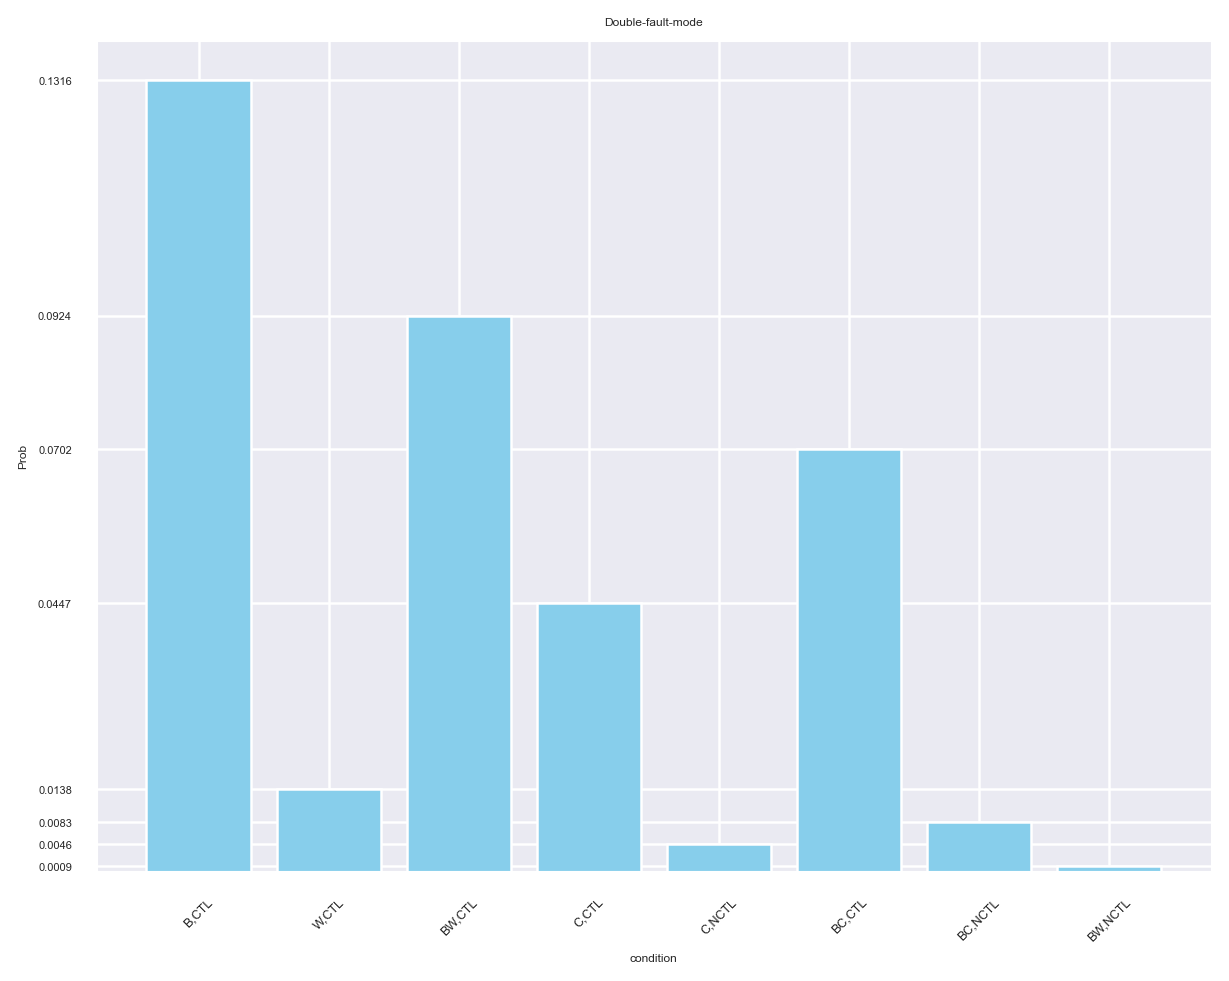

In [92]:
keys = list(mode_ofen_err.keys())
values = list(mode_ofen_err.values())

# 绘制条形图

plt.figure(figsize=(8,6),dpi=180)
plt.bar(keys, values, color='skyblue')
plt.xlabel('condition')
plt.ylabel('Prob')
plt.yticks(values)
plt.xticks(range(0, len(keys), 1), rotation=45,fontsize=5)
plt.title("Double-fault-mode")
# 显示图形
plt.show()

In [61]:
{'Carlos Alcaraz': 'C,NCTL', 'Nicolas Jarry': 'C,NCTL', 'Alexander Zverev': 'C,NCTL', 'Matteo Berrettini': 'C,NCTL', 'Frances Tiafoe': 'C,NCTL', 'Grigor Dimitrov': 'C,NCTL', 'Alejandro Davidovich Fokina': 'BW,NCTL', 'Holger Rune': 'C,NCTL', 'Daniil Medvedev': 'C,NCTL', 'Marton Fucsovics': 'W,CTL', 'Jiri Lehecka': 'W,CTL', 'Tommy Paul': 'C,NCTL', 'Christopher Eubanks': 'C,NCTL', "Christopher O'Connell": 'C,NCTL', 'Laslo Djere': 'C,NCTL', 'Stefanos Tsitsipas': 'C,NCTL', 'Jannik Sinner': 'C,NCTL', 'Quentin Halys': 'C,NCTL', 'Daniel Elahi Galan': 'BW,NCTL', 'Mikael Ymer': 'BW,NCTL', 'Guido Pella': 'C,NCTL', 'Roman Safiullin': 'W,CTL', 'Denis Shapovalov': 'C,NCTL', 'Liam Broady': 'C,NCTL', 'Andrey Rublev': 'C,NCTL', 'David Goffin': 'C,NCTL', 'Alexander Bublik': 'C,NCTL', 'Maximilian Marterer': 'W,CTL', 'Lorenzo Musetti': 'C,NCTL', 'Hubert Hurkacz': 'C,NCTL', 'Stan Wawrinka': 'C,NCTL', 'Novak Djokovic': 'C,NCTL'} == {'Carlos Alcaraz': 'C,NCTL', 'Nicolas Jarry': 'C,NCTL', 'Alexander Zverev': 'C,NCTL', 'Matteo Berrettini': 'C,NCTL', 'Frances Tiafoe': 'C,NCTL', 'Grigor Dimitrov': 'C,NCTL', 'Alejandro Davidovich Fokina': 'BW,NCTL', 'Holger Rune': 'W,CTL', 'Daniil Medvedev': 'C,NCTL', 'Marton Fucsovics': 'W,CTL', 'Jiri Lehecka': 'W,CTL', 'Tommy Paul': 'C,NCTL', 'Christopher Eubanks': 'C,NCTL', "Christopher O'Connell": 'C,NCTL', 'Laslo Djere': 'W,CTL', 'Stefanos Tsitsipas': 'C,NCTL', 'Jannik Sinner': 'B,NCTL', 'Quentin Halys': 'C,NCTL', 'Daniel Elahi Galan': 'BW,NCTL', 'Mikael Ymer': 'BW,NCTL', 'Guido Pella': 'C,NCTL', 'Roman Safiullin': 'W,CTL', 'Denis Shapovalov': 'C,NCTL', 'Liam Broady': 'C,NCTL', 'Andrey Rublev': 'C,NCTL', 'David Goffin': 'C,NCTL', 'Alexander Bublik': 'C,NCTL', 'Maximilian Marterer': 'W,CTL', 'Lorenzo Musetti': 'C,NCTL', 'Hubert Hurkacz': 'C,NCTL', 'Stan Wawrinka': 'C,NCTL', 'Novak Djokovic': 'C,NCTL'}

False

In [14]:
print(feacture)

{'Carlos Alcaraz': {'brk_cnt': 0.10492845786963434, 'brk_won': 0.3333333333333333, 'net_cnt': 0.11847555923777962, 'net_won': 0.7622377622377622, 'unf_err_cnt': 0.1060480530240265, 'dub_fault_cnt': 0.020712510356255178, 'ace_cnt': 0.05468102734051367, 'dist': 3965.844799999996}, 'Nicolas Jarry': {'brk_cnt': 0.046357615894039736, 'brk_won': 0.2857142857142857, 'net_cnt': 0.17666666666666667, 'net_won': 0.5471698113207547, 'unf_err_cnt': 0.15333333333333332, 'dub_fault_cnt': 0.01, 'ace_cnt': 0.1, 'dist': 4517.830999999999}, 'Alexander Zverev': {'brk_cnt': 0.008928571428571428, 'brk_won': 0.0, 'net_cnt': 0.16417910447761194, 'net_won': 0.6666666666666666, 'unf_err_cnt': 0.11442786069651742, 'dub_fault_cnt': 0.004975124378109453, 'ace_cnt': 0.11940298507462686, 'dist': 2848.0000000000005}, 'Matteo Berrettini': {'brk_cnt': 0.041025641025641026, 'brk_won': 0.25, 'net_cnt': 0.11267605633802817, 'net_won': 0.6666666666666666, 'unf_err_cnt': 0.12910798122065728, 'dub_fault_cnt': 0.0070422535211

In [15]:
import numpy as np 
dis = []
for p1name in names:
    dis.append(feacture[p1name]["dist"])

mean_dis = np.mean(np.array(dis))
std_dis = np.std(np.array(dis))

print(mean_dis,std_dis)

for p1name in names:
    feacture[p1name]["dist"] = (feacture[p1name]["dist"] - mean_dis)/std_dis

print(feacture.keys())


    

3258.434492708333 930.3078679970499
dict_keys(['Carlos Alcaraz', 'Nicolas Jarry', 'Alexander Zverev', 'Matteo Berrettini', 'Frances Tiafoe', 'Grigor Dimitrov', 'Alejandro Davidovich Fokina', 'Holger Rune', 'Daniil Medvedev', 'Marton Fucsovics', 'Jiri Lehecka', 'Tommy Paul', 'Christopher Eubanks', "Christopher O'Connell", 'Laslo Djere', 'Stefanos Tsitsipas', 'Jannik Sinner', 'Quentin Halys', 'Daniel Elahi Galan', 'Mikael Ymer', 'Guido Pella', 'Roman Safiullin', 'Denis Shapovalov', 'Liam Broady', 'Andrey Rublev', 'David Goffin', 'Alexander Bublik', 'Maximilian Marterer', 'Lorenzo Musetti', 'Hubert Hurkacz', 'Stan Wawrinka', 'Novak Djokovic'])


In [16]:
print(feacture.keys())

dict_keys(['Carlos Alcaraz', 'Nicolas Jarry', 'Alexander Zverev', 'Matteo Berrettini', 'Frances Tiafoe', 'Grigor Dimitrov', 'Alejandro Davidovich Fokina', 'Holger Rune', 'Daniil Medvedev', 'Marton Fucsovics', 'Jiri Lehecka', 'Tommy Paul', 'Christopher Eubanks', "Christopher O'Connell", 'Laslo Djere', 'Stefanos Tsitsipas', 'Jannik Sinner', 'Quentin Halys', 'Daniel Elahi Galan', 'Mikael Ymer', 'Guido Pella', 'Roman Safiullin', 'Denis Shapovalov', 'Liam Broady', 'Andrey Rublev', 'David Goffin', 'Alexander Bublik', 'Maximilian Marterer', 'Lorenzo Musetti', 'Hubert Hurkacz', 'Stan Wawrinka', 'Novak Djokovic'])


In [ ]:
fet = np.ones((len(feacture.keys()),len(feacture['Carlos Alcaraz'].keys())))
print(fet.shape)
print(feacture)
for i,(key,val) in enumerate(feacture.items()):

    for j ,(k,v) in enumerate(val.items()):
        fet[i,j] = v

print(fet) 


#plt.matshow(fet)



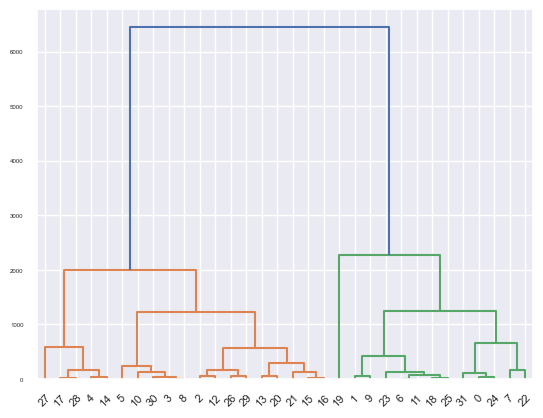

In [30]:
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram
#这里使用scipy的层次聚类函数
Z = linkage(fet, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
# plt.savefig('img/AGG层次聚类.png',dpi=300)
plt.show()

In [22]:
new_fet = np.zeros(32)
for i in range(32):
    new_fet[i] = fet[i,0]+fet[i,1]+fet[i,2]+fet[i,3] - fet[i,4]- fet[i,5]

print(new_fet)

print("mean",new_fet.mean())
print("median",np.median(new_fet))

[1.19221455 0.89257505 0.72037136 0.93421813 0.41364606 1.41269508
 0.95663799 0.93050219 1.00479258 0.94456626 1.25775534 0.85530303
 1.10519468 1.32963177 1.12354926 1.32092437 1.10491338 1.09997126
 1.29113634 0.91243214 0.97687057 1.33867689 1.07931184 1.00166206
 1.0225871  1.09537237 1.04628953 0.48221555 0.73528708 1.27947119
 0.19560878 1.14034803]
mean 1.006147868608901
median 1.034438317008786


In [18]:

from sklearn.cluster import KMeans
#print(newx)
kmeans = KMeans(n_clusters=2,n_init=40)
kmeans.fit(fet)

label1s = kmeans.labels_
centers = kmeans.cluster_centers_

print(centers)

#{'brk_cnt': 0.10492845786963434, 'brk_won': 0.3333333333333333, 'net_cnt': 0.11847555923777962, 'net_won': 0.7622377622377622, 'unf_err_cnt': 0.1060480530240265, 'dub_fault_cnt': 0.020712510356255178, 'ace_cnt': 0.05468102734051367, 'dist': 3965.844799999996}




[[ 0.07665518  0.32697792  0.10738436  0.67393491  0.14457375  0.01617484
   0.06193647  1.04824914]
 [ 0.04504462  0.29313309  0.12336304  0.67744092  0.12761563  0.01757221
   0.10133568 -0.7172231 ]]


c:\Users\32089\anaconda3\envs\mcm\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-6.67238291e+02 -5.03128064e-03]
[9.75194426e+02 7.35341016e-03]
